In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
def read_images(folder_path):
    image_list = []
    raw_image = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions as needed
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            image_array = np.array(image)
            raw_image.append(image)
            transformed_image = np.log1p(image_array)

            # Normalize the transformed image to 0-255 range
            transformed_image = (transformed_image / np.max(transformed_image)) * 255

            # Convert the image back to uint8 data type
            transformed_image = np.uint8(transformed_image)
            image_list.append(transformed_image)
    return np.array(image_list),np.array(raw_image)

# Example usage
directory_path = './data/'  # Replace with the path to your directory
image_list ,raw_images= read_images(directory_path)
print(image_list)
# Print the list of image files
# for image_file in image_list:
#     print(image_file)

[[[[254 255 253]
   [251 252 250]
   [254 254 253]
   ...
   [255 255 255]
   [252 252 252]
   [255 255 255]]

  [[249 250 248]
   [166 169 157]
   [  0  50   0]
   ...
   [ 50  50  50]
   [168 168 168]
   [249 249 249]]

  [[254 255 254]
   [  0  50   0]
   [  0  31   0]
   ...
   [  0   0  50]
   [  0   0   0]
   [255 255 255]]

  ...

  [[255 254 255]
   [ 63   0  73]
   [ 63   0  73]
   ...
   [ 63   0  73]
   [ 63   0  73]
   [255 254 255]]

  [[255 254 255]
   [ 63   0  73]
   [ 63   0  73]
   ...
   [ 95  50 101]
   [ 82   0  89]
   [255 254 255]]

  [[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [255 254 255]
   [255 254 255]
   [255 254 255]]]


 [[[255 254 255]
   [249 248 249]
   [255 254 255]
   ...
   [252 253 252]
   [252 253 251]
   [254 255 254]]

  [[250 249 250]
   [166 163 167]
   [ 95  82 101]
   ...
   [ 73  89  31]
   [160 163 156]
   [250 250 249]]

  [[255 254 255]
   [ 31   0  50]
   [ 31   0  50]
   ...
   [  0  31   0]
   [  0  31   0]
   [254 255

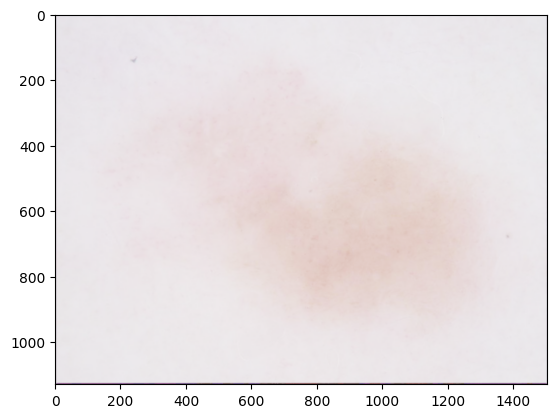

In [2]:
plt.imshow(image_list[0])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color,feature
from skimage.color import rgb2gray

from sklearn.cluster import MeanShift,estimate_bandwidth
# from skimage.segmentation import mean_shift
def fcm_clustering(image, n_clusters, fuzziness, max_iter=100, tol=1e-5):
    image_flat = image.reshape((image.shape[0] * image.shape[1],3))
    n_pixels = image_flat.shape[0]
    n_channels = image.shape[-1]

    # Initialize cluster centers randomly
    cluster_centers = np.random.rand(n_clusters, n_channels)
    print(cluster_centers)
    for _ in range(max_iter):
        # Compute distances from pixels to cluster centers
        distances = np.linalg.norm(image_flat[:, np.newaxis] - cluster_centers, axis=2)

        # Compute membership values or fuzzy partitions
        membership = 1 / (distances ** (2 / (fuzziness - 1)))
        membership = membership / np.sum(membership, axis=1, keepdims=True)

        # Update cluster centers
        cluster_centers_new = np.dot(membership.T, image_flat) / np.sum(membership, axis=0, keepdims=True).T

        # Check convergence
        if np.linalg.norm(cluster_centers_new - cluster_centers) < tol:
            break

        cluster_centers = cluster_centers_new

    # Find the cluster with the highest membership for each pixel
    image_segmented = np.argmax(membership, axis=1)

    # Reshape segmented image back to original shape
#     image_segmented = np.reshape(image_segmented, 1)
    image_segmented = np.reshape(image_segmented, image.shape[:-1])

    return image_segmented



# def calculate_mean_shift_vector(image, spatial_radius, range_radius, min_density):
#     # Load the image
    
    
#     # Convert the image to the Lab color space
#     image_lab = color.rgb2lab(image)
    
#     # Perform mean shift segmentation
#     labels = mean_shift(image_lab, spatial_radius=spatial_radius,
#                                      range_radius=range_radius, min_density=min_density)
    
#     # Calculate the mean shift vector
#     mean_shift_vector = np.mean(labels, axis=(0, 1))
    
#     return mean_shift_vector

# def mean_shift_segmentation(image, spatial_radius, range_radius, min_density):
#     # Reshape the image to a flattened array of RGB values
# #     gray = rgb2gray(image)
#     print(image.shape)
#     flattened_image = image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
# #     bandwidth = estimate_bandwidth(gray)
#     # Perform mean shift clustering
#     ms = MeanShift(bandwidth=spatial_radius,n_jobs=8,max_iter=8)
#     ms.fit(flattened_image)
    
#     # Retrieve the labels and cluster centers
#     labels = ms.labels_
#     cluster_centers = ms.cluster_centers_
    
#     # Reshape the labels back to the image shape
#     segmented_image = labels.reshape(image.shape[:2])
    
#     return segmented_image, cluster_centers


# Load image
# image = data.astronaut()
image = image_list[0]
# print("IMAGE diemnsions:::",image.shape)
# image_rgb = color.rgb2lab(image)
# print("RGB dimensions::",image_rgb.shape)
# Perform Fuzzy C-Means clustering
n_clusters = 3
fuzziness = 2
# print(image_rgb.shape)
# anisotropic kernel
sigma_s = 8

# Mean shift vectors
spatial_radius = 5  # Spatial radius for mean shift
range_radius = 15  # Range radius for mean shift
min_density = 20  # Minimum density for mean shift


segmented_image = fcm_clustering(image, n_clusters, fuzziness)
# kernel = compute_anisotropic_kernel(image, sigma_s)

# Compute color radius
# color_radius = compute_color_radius(image, kernel)

# Perform mean shift segmentation
# segmented_image_ms, cluster_centers = mean_shift_segmentation(image, spatial_radius=color_radius, range_radius=6, min_density=20)

# Plot original and segmented images
# fig, axes = plt.subplots(3, 3, figsize=(20, 20))
# axes[0,0].imshow(image)
# axes[0,0].set_title('Original')
# axes[0,0].axis('off')
# axes[0,1].imshow(segmented_image, cmap='nipy_spectral')
# axes[0,1].set_title('Segmented FCM')
# axes[0,1].axis('off')

# axes[0,2].imshow(segmented_image_ms, cmap='nipy_spectral')
# axes[0,2].set_title('Segmented Meanshift')
# axes[0,2].axis('off')

# mask = np.where(np.all(kernel >=1, axis=-1))
# axes[1,0].imshow(kernel, cmap='gray')
# axes[1,0].set_title('Anisotropic Kernel')
# axes[1,0].axis('off')
# axes[1,1].text(0.5, 0.5, f'Color Radius: {color_radius:.2f}', fontsize=12, ha='center', va='center')
# axes[1,1].set_title('Color Radius')
# axes[1,1].axis('off')
# plt.show()
# print(mean_shift_vector)

[[0.54789397 0.02395749 0.01436159]
 [0.50030779 0.49044925 0.10260346]
 [0.76862002 0.07094176 0.58401619]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


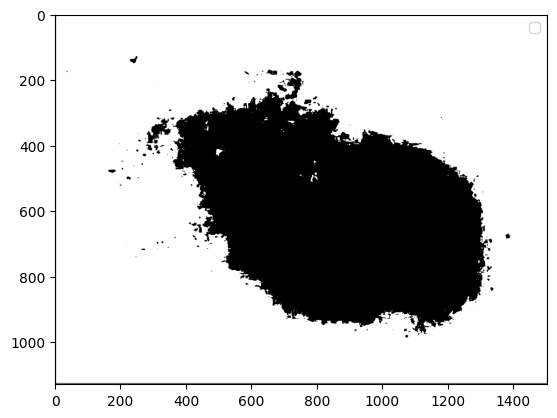

In [9]:
mask = np.where(np.all(segmented_image>0,axis=1))
g = segmented_image  == 1
segmented_image[g] = 0
plt.imshow(segmented_image,cmap='gray')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


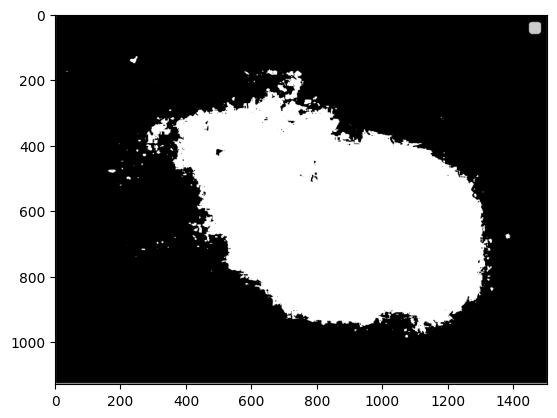

In [10]:
# mask = np.where(np.all(kernel >=1, axis=-1))
# plt.imshow(kernel[mask],cmap='gray')
mask = segmented_image <= 1
seg = segmented_image.copy()
seg[mask] = 255
plt.imshow(seg,cmap = 'gray')
plt.legend()

(-0.5, 1503.5, 1128.5, -0.5)

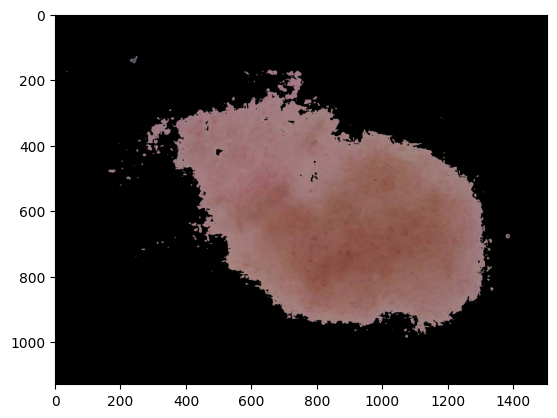

In [11]:
image = raw_images[0]

# Display the LUV image
plt.imshow(np.bitwise_and(image,np.expand_dims(seg, axis=2)))
plt.axis('on')
# plt.show()

In [ ]:
# import numpy as np

# def initialize_data(image):
#     # Convert the image to feature points
#     feature_points = image.reshape(-1, 3).astype(np.float32)
#     return feature_points

# def initialize_kernels(feature_points):
#     # Initialize the kernel for each feature point
#     kernels = feature_points.copy()
#     return kernels

# def initialize_bandwidth_matrices(num_points, spatial_bandwidth, range_bandwidth):
#     # Initialize the bandwidth matrices in the spatial domain
#     spatial_bandwidth_matrices = np.eye(num_points) * (spatial_bandwidth ** 2)

#     # Initialize the bandwidths in the range domain
#     range_bandwidths = np.full(num_points, range_bandwidth)

#     return spatial_bandwidth_matrices, range_bandwidths

# # Example usage
# image = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8)
# num_points = image.shape[0] * image.shape[1]
# spatial_bandwidth = 2
# range_bandwidth = 0.5

# # Initialize data and kernels
# feature_points = initialize_data(image)
# kernels = initialize_kernels(feature_points)

# # Initialize bandwidth matrices
# spatial_bandwidth_matrices, range_bandwidths = initialize_bandwidth_matrices(num_points, spatial_bandwidth, range_bandwidth)

# # print("Number of feature points:", num_points)
# print("Feature points shape:", feature_points.shape)
# print("Kernels shape:", kernels.shape)
# # print("Spatial bandwidth matrices shape:", spatial_bandwidth_matrices.shape)
# # print("Range bandwidths shape:", range_bandwidths.shape)
# # plt.imshow(kernels)

In [ ]:
# import numpy as np

# def compute_anisotropic_kernel(feature_points, bandwidth_matrices, range_bandwidths):
#     num_points = feature_points.shape[0]
#     anisotropic_kernels = np.zeros((num_points, num_points))

#     for i in range(num_points):
#         diff = feature_points - feature_points[i]
#         diff_squared = np.square(diff)
#         kernel_spatial = np.sum(np.divide(diff_squared, bandwidth_matrices[i]), axis=1)
#         kernel_range = np.divide(diff_squared[:, -1], range_bandwidths[i] ** 2)
#         valid_neighbors = np.where((kernel_spatial < 1) & (kernel_range < 1))[0]
#         anisotropic_kernels[i, valid_neighbors] = 1

#     return anisotropic_kernels

# def update_bandwidth_matrices(feature_points, kernels, bandwidth_matrices, range_bandwidths):
#     num_points = feature_points.shape[0]
#     updated_bandwidth_matrices = np.zeros_like(bandwidth_matrices)

#     for i in range(num_points):
#         diff = feature_points - feature_points[i]
#         diff_squared = np.square(diff)
#         kernel_range = np.divide(diff_squared[:, -1], range_bandwidths[i] ** 2)
#         valid_neighbors = np.where(kernel_range < 1)[0]
#         bandwidth_sum = np.sum(np.divide(diff_squared[valid_neighbors], range_bandwidths[i]), axis=0)
#         updated_bandwidth_matrices[i] = np.diag(bandwidth_sum)

#     return updated_bandwidth_matrices

# def modulate_eccentricity(bandwidth_matrices, alpha):
#     modified_bandwidth_matrices = np.power(bandwidth_matrices, alpha)
#     return modified_bandwidth_matrices

# def modulate_scale(bandwidth_matrices, beta):
#     modified_bandwidth_matrices = np.multiply(bandwidth_matrices, beta)
#     return modified_bandwidth_matrices

# def modulate_color_tolerance(range_bandwidths, gamma):
#     modified_range_bandwidths = np.power(range_bandwidths, gamma)
#     return modified_range_bandwidths

# # Example usage
# feature_points = np.random.rand(100, 5)
# bandwidth_matrices = np.eye(100)
# range_bandwidths = np.ones(100)
# alpha = 0.5
# beta = 2.0
# gamma = 1.5

# # Compute anisotropic kernels
# anisotropic_kernels = compute_anisotropic_kernel(feature_points, bandwidth_matrices, range_bandwidths)

# # Update bandwidth matrices
# updated_bandwidth_matrices = update_bandwidth_matrices(feature_points, anisotropic_kernels, bandwidth_matrices, range_bandwidths)

# # Modulate eccentricity
# modified_bandwidth_matrices = modulate_eccentricity(updated_bandwidth_matrices, alpha)

# # Modulate scale
# modified_bandwidth_matrices = modulate_scale(modified_bandwidth_matrices, beta)

# # Modulate color tolerance
# modified_range_bandwidths = modulate_color_tolerance(range_bandwidths, gamma)

# print("Anisotropic Kernels shape:", anisotropic_kernels.shape)
# print("Updated Bandwidth Matrices shape:", updated_bandwidth_matrices.shape)
# print("Modified Bandwidth Matrices shape:", modified_bandwidth_matrices.shape)
# print("Modified Range Bandwidths shape:", modified_range_bandwidths.shape)